In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import string
import random
import re
import collections
import matplotlib.pyplot as plt
from scipy.signal import welch, hanning

In [3]:
full_dataset = pd.read_csv('/Users/anamaria1/Desktop/Conferences/2019/Novartis/cfDNA/Hack9-DataAnalysisFolders/DATA.csv',sep='\t')

In [4]:
full_dataset.head(2)

,Unnamed: 0,0,1,2,3,4,5,gene_id,transcript_id,gene_type,...,transcript_status,transcript_name,exon_number,exon_id,level,protein_id,tag,ccdsid,havana_gene,havana_transcript
0,0,LIB-ZIIEJE,chr1,3598930,3598995,"-0.735294,-0.735294,-0.735294,-0.735294,-0.735...",+,ENSG00000078900.10,ENST00000378295.4,protein_coding,...,KNOWN,TP73-001,2,ENSE00000868857.1,2,ENSP00000367545.4,CCDS,CCDS49.1,OTTHUMG00000000610.5,OTTHUMT00000001468.4
1,1,LIB-ZIIEJE,chr1,3599624,3599745,"-0.780822,-0.780822,-0.780822,-0.780822,-0.726...",+,ENSG00000078900.10,ENST00000378295.4,protein_coding,...,KNOWN,TP73-001,3,ENSE00000358575.1,2,ENSP00000367545.4,CCDS,CCDS49.1,OTTHUMG00000000610.5,OTTHUMT00000001468.4


In [5]:
del full_dataset['Unnamed: 0']
del full_dataset['5']
full_dataset.rename(columns={'0':'PatientId', '1':'Chromosome', '2':'ExonStart', '3':'ExonEnd', 
                               '4':'WPS'},inplace=True)

In [6]:
print('Number of  samples %s'% full_dataset['PatientId'].unique().shape[0])

Number of  samples 314


In [7]:
full_dataset.head(2)

,PatientId,Chromosome,ExonStart,ExonEnd,WPS,gene_id,transcript_id,gene_type,gene_status,gene_name,...,transcript_status,transcript_name,exon_number,exon_id,level,protein_id,tag,ccdsid,havana_gene,havana_transcript
0,LIB-ZIIEJE,chr1,3598930,3598995,"-0.735294,-0.735294,-0.735294,-0.735294,-0.735...",ENSG00000078900.10,ENST00000378295.4,protein_coding,KNOWN,TP73,...,KNOWN,TP73-001,2,ENSE00000868857.1,2,ENSP00000367545.4,CCDS,CCDS49.1,OTTHUMG00000000610.5,OTTHUMT00000001468.4
1,LIB-ZIIEJE,chr1,3599624,3599745,"-0.780822,-0.780822,-0.780822,-0.780822,-0.726...",ENSG00000078900.10,ENST00000378295.4,protein_coding,KNOWN,TP73,...,KNOWN,TP73-001,3,ENSE00000358575.1,2,ENSP00000367545.4,CCDS,CCDS49.1,OTTHUMG00000000610.5,OTTHUMT00000001468.4


In [8]:
a = full_dataset.groupby(['PatientId','Chromosome'])['WPS'].apply(','.join).reset_index()

In [9]:
a.head()

,PatientId,Chromosome,WPS
0,LIB-ZIIEJE,chr1,"-0.735294,-0.735294,-0.735294,-0.735294,-0.735..."
1,LIB-ZIIEJE,chr10,"-0.828169,-0.835655,-0.846797,-0.850416,-0.842..."
2,LIB-ZIIEJE,chr11,"-1.844444,-1.900000,-1.902174,-1.872340,-1.836..."
3,LIB-ZIIEJE,chr12,"-1.420561,-1.410714,-1.392857,-1.353448,-1.336..."
4,LIB-ZIIEJE,chr13,"-3.133333,-3.032258,-2.906250,-2.906250,-2.735..."


In [10]:
def chr_profile(x):
    p = x.split(',')
    results = list(map(float, p))
    return results

In [11]:
def len_wps(x):
    return len(x.split(','))

In [11]:
AllChrProfiles = a['WPS'].apply(lambda row : chr_profile(row))

In [12]:
AllChrProfiles.head()

0    [-0.735294, -0.735294, -0.735294, -0.735294, -...
1    [-0.828169, -0.835655, -0.846797, -0.850416, -...
2    [-1.844444, -1.9, -1.902174, -1.87234, -1.8367...
3    [-1.420561, -1.410714, -1.392857, -1.353448, -...
4    [-3.133333, -3.032258, -2.90625, -2.90625, -2....
Name: WPS, dtype: object

In [13]:
ind_chr1 = a[a['Chromosome']=='chr1'].index.values

In [14]:
chr1_matrix = np.array(AllChrProfiles[ind_chr1].values.tolist())
chr1_matrix_mean = np.mean(chr1_matrix,axis=0)

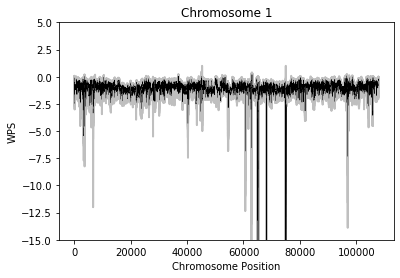

In [15]:
for i in range(0,20):
    plt.plot(AllChrProfiles[ind_chr1[i]],color='0.75',linewidth=2)
    plt.plot(chr1_matrix_mean,color='k',linewidth=0.25)
    plt.title('Chromosome 1')
    plt.xlabel('Chromosome Position')
    plt.ylabel('WPS')
    plt.ylim((-15,5))  
plt.show()

In [12]:
labels = pd.read_csv('Data/20190819_WPS_NORM.hackathon_sample_info_updated.csv')
labels = labels.fillna('N/A')
labels.rename(columns={'library':'PatientId', 'hotspot':'Oncogene'},inplace=True)

In [13]:
zeroPurity = labels[(labels['estimated.purity']==0) & (labels['ctdna.score']<=0.01)]

In [14]:
highPurity = labels[labels['estimated.purity']>=0.5]

In [15]:
zero_ids = zeroPurity['PatientId'].tolist()
high_ids = highPurity['PatientId'].tolist()

In [16]:
zero_a = a[a['PatientId'].isin(zero_ids)]
high_a = a[a['PatientId'].isin(high_ids)]

In [17]:
zero_a['PatientId'].unique().shape[0]

62

In [18]:
high_a['PatientId'].unique().shape[0]

7

In [19]:
# Remove X/Y chromosomes
high_a.drop(high_a[high_a['Chromosome']=='chrX'].index,axis=0,inplace=True)
high_a.drop(high_a[high_a['Chromosome']=='chrY'].index,axis=0,inplace=True)
zero_a.drop(zero_a[zero_a['Chromosome']=='chrX'].index,axis=0,inplace=True)
zero_a.drop(zero_a[zero_a['Chromosome']=='chrY'].index,axis=0,inplace=True)

/Users/anamaria1/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [20]:
Zero_ChrProfiles = zero_a['WPS'].apply(lambda row : chr_profile(row))
High_ChrProfiles = high_a['WPS'].apply(lambda row : chr_profile(row))

In [21]:
n = high_a['PatientId'].unique().shape[0]
r_ind = np.random.randint(zero_a['PatientId'].unique().shape[0], size=n)
j = 1
label = ('chr%s'%(j+1))
k1 = high_a[high_a['Chromosome']==label].index.values
k2 = zero_a[zero_a['Chromosome']==label].index.values

In [22]:
tmp1_matrix = np.array(High_ChrProfiles[k1].values.tolist())
tmp2_matrix = np.array(Zero_ChrProfiles[k2].values.tolist())

tmp1_matrix_mean = np.mean(tmp1_matrix,axis=0)
tmp2_matrix_mean = np.mean(tmp2_matrix,axis=0)

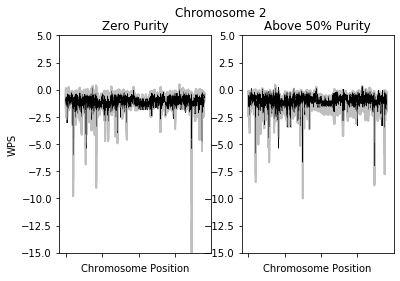

In [23]:
from matplotlib.pyplot import style, savefig
# Plot side-by-side zero and high purity chromosome WPS data
_, (ax1, ax2) = plt.subplots(1,2)
for i in range(0,n): 
    ax1.plot(Zero_ChrProfiles[k2[i]],color='0.75',linewidth=2)
    ax1.plot(tmp1_matrix_mean,color='k',linewidth=0.25)
    ax2.plot(High_ChrProfiles[k1[i]],color='0.75',linewidth=2)
    ax2.plot(tmp2_matrix_mean,color='k',linewidth=0.25)
    _.suptitle('Chromosome %s'%(j+1))
ax1.set_xlabel('Chromosome Position')
ax1.set_ylabel('WPS')
ax1.set_ylim((-15,5)) 
ax1.set_title('Zero Purity')
ax1.set_xticklabels([])
ax2.set_xlabel('Chromosome Position')
ax2.set_xticklabels([])
ax2.set_ylim((-15,5)) 
ax2.set_title('Above 50% Purity')
#savefig('chr%s_plots.eps'%(j+1),bbox_inches='tight')
plt.show()

In [ ]:
####################################################################################
############### Wavelet Transformations of the WPS #################################
####################################################################################

In [24]:
from scipy import signal 
import math 
import pywt

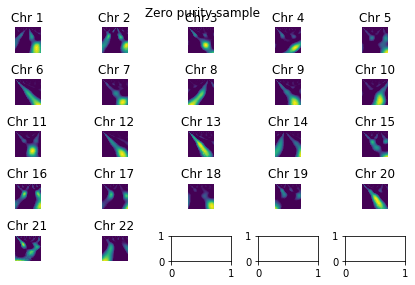

In [25]:
_, axs = plt.subplots(5,5)
_.suptitle('Zero purity sample')
scales = range(1,128)
waveletname = 'morl'
for j in range(0,22):
    label = ('chr%s'%(j+1))
    k2 = zero_a[zero_a['Chromosome']==label].index.values
    k1 = high_a[high_a['Chromosome']==label].index.values
    
    j_row = math.floor(j/5)
    j_col = j%5
    #print(j,j_row,j_col)
    coeff1, freq1 = pywt.cwt(High_ChrProfiles[k1[5]], scales, waveletname, 1)
    coeff1_ = coeff1[:,:127]
    
    coeff2, freq2 = pywt.cwt(Zero_ChrProfiles[k2[5]], scales, waveletname, 1)
    coeff2_ = coeff2[:,:127]
    
    im = axs[j_row,j_col].imshow(coeff2_,vmin=0, vmax=np.max(coeff2_))
    axs[j_row,j_col].set_title('Chr %s'%(j+1))
    axs[j_row,j_col].axis('off')
    
_.tight_layout()
#plt.savefig('ZeroPurity_CWT_PerChromosome.eps', dpi=80, bbox_inches='tight')
plt.show()